In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('winequality-red.csv')

In [4]:
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


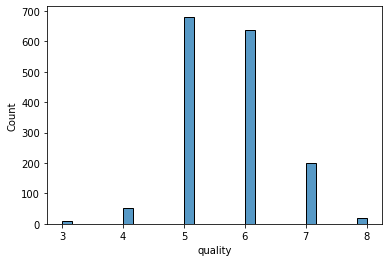

In [5]:
fig, ax = plt.subplots()
ax = sns.histplot(data['quality'])
plt.show()

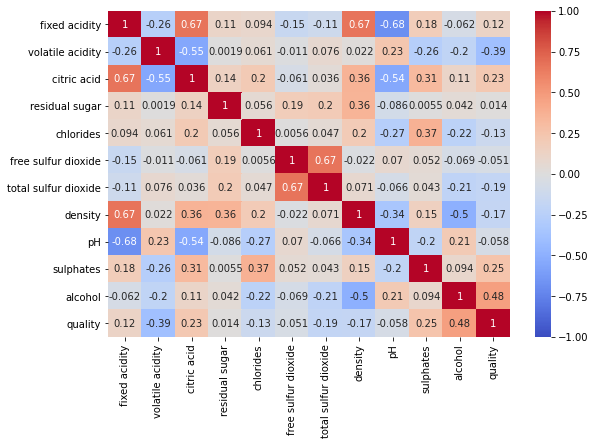

In [6]:
fig,ax = plt.subplots(figsize=(9,6))
ax = sns.heatmap(data.corr(), annot=True, vmin=-1, center=0, vmax=1, cmap='coolwarm')

In [7]:
y = data['quality']
X = data.drop(columns=['quality'])

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111, stratify=y)

X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [45]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    1119.000000
mean        0.655094
std         0.159843
min         0.370000
25%         0.550000
50%         0.620000
75%         0.730000
max         1.950000
Name: sulphates, dtype: float64

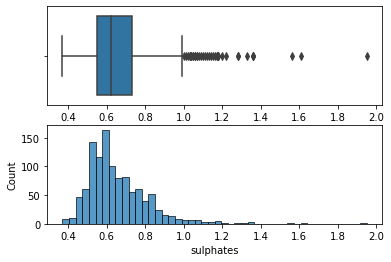

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

i = 9

sns.boxplot(X_train[X_train.columns[i]], ax=ax1)
sns.histplot(X_train[X_train.columns[i]], ax=ax2)

X_train[X_train.columns[i]].describe()

In [47]:
X_train[X_train.columns[i]].sum()/1119

0.6550938337801608

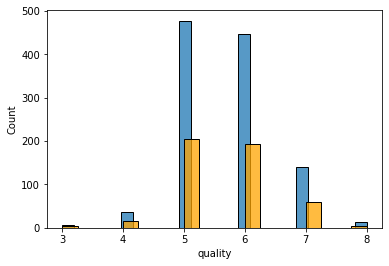

In [63]:
fig, ax = plt.subplots()
ax = sns.histplot(y_train)
ax = sns.histplot(y_test, color='orange')
plt.show()

In [67]:
X_train.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [35]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numerical_features = X_train.columns.values
numerical_transforer = RobustScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transforer, numerical_features)
        ])

pre = Pipeline(steps=[('preprocessor', preprocessor)])


X_train = pd.DataFrame(pre.fit_transform(X_train), columns=numerical_features)
X_test = pd.DataFrame(pre.transform(X_test), columns=numerical_features)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

xgbc = XGBClassifier()
dtc = DecisionTreeClassifier(random_state=111)
knc = KNeighborsClassifier()
lrc = LogisticRegression(max_iter=150)
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)

In [37]:
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=111)

[0.6145833333333334, 0.5666666666666667, 0.5604166666666667, 0.6729166666666667, 0.5270833333333333, 0.65625, 0.6833333333333333]


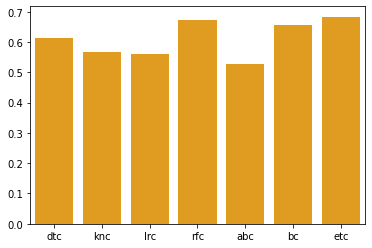

In [38]:
from sklearn.metrics import f1_score

models = ['dtc','knc','lrc', 'rfc','abc','bc','etc']

results1 = [f1_score(dtc.predict(X_test), y_test, average='micro'),
    f1_score(knc.predict(X_test), y_test, average='micro'), f1_score(lrc.predict(X_test), y_test, average='micro'),
    f1_score(rfc.predict(X_test), y_test, average='micro'), f1_score(abc.predict(X_test), y_test, average='micro'),
    f1_score(bc.predict(X_test), y_test, average='micro'), f1_score(etc.predict(X_test), y_test, average='micro')]

sns.barplot(x=models, y=results1, color='orange')

print(results1)

In [88]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

cols = X_train.columns[sel.get_support()]
cols

Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')

In [89]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(etc)
sel.fit(X_train, y_train)

cols = X_train.columns[sel.get_support()]
cols

Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')

In [90]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.2404 ± 0.0233,alcohol
0.1505 ± 0.0138,sulphates
0.1317 ± 0.0143,volatile acidity
0.0576 ± 0.0027,citric acid
0.0465 ± 0.0062,total sulfur dioxide
0.0300 ± 0.0056,density
0.0288 ± 0.0076,chlorides
0.0186 ± 0.0031,pH
0.0177 ± 0.0031,free sulfur dioxide
0.0147 ± 0.0024,residual sugar


In [91]:
perm = PermutationImportance(etc, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.1755 ± 0.0262,alcohol
0.0441 ± 0.0053,volatile acidity
0.0300 ± 0.0094,total sulfur dioxide
0.0275 ± 0.0031,citric acid
0.0204 ± 0.0058,sulphates
0.0014 ± 0.0014,residual sugar
0.0011 ± 0.0007,density
0.0009 ± 0.0011,chlorides
0.0009 ± 0.0011,fixed acidity
0.0004 ± 0.0009,pH


In [94]:
search_space = {
    "n_estimators": [100, 75, 125, 50],
    "criterion": ['gini', 'entropy'],
    "min_samples_split":[2,3],
    "max_features": ['auto', 'sqrt', 'log2'],
    "bootstrap": [True, False],
    "random_state": [111]
}

In [95]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='f1_micro',
                    return_train_score=True,
                    n_jobs=-1,  
                    ) 

In [96]:
best_model = grid.fit(X_train, y_train)

In [98]:
print(best_model.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 111}


In [104]:
rfc_best = RandomForestClassifier(min_samples_split=3, random_state=111)

rfc_best.fit(X_train, y_train)

print('rfc_best', f1_score(rfc_best.predict(X_test), y_test, average='micro'))

lrc_best 0.6791666666666667


In [106]:
from sklearn.metrics import classification_report

print (classification_report(y_test, rfc_best.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.72      0.79      0.75       204
           6       0.65      0.67      0.66       192
           7       0.65      0.60      0.63        60
           8       0.00      0.00      0.00         5

    accuracy                           0.68       480
   macro avg       0.34      0.34      0.34       480
weighted avg       0.65      0.68      0.66       480



C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


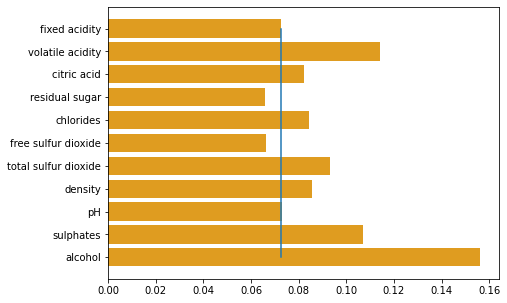

In [109]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))

ax=sns.barplot(y=X_train.columns, x=rfc.feature_importances_, color='orange')
ax.plot(0.8*np.mean(rfc.feature_importances_)*np.ones(len(rfc.feature_importances_)), X_train.columns)
plt.show()